In [1]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Data Collection and Preprocessing. 

adv_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
adv_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Checking the columns.
adv_data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
# Checking the shape of the data.

adv_data.shape

(200, 5)

In [5]:
# The data has 200 rows and 5 columns.

In [6]:
# Checking the information about the columns.
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# We found that there is no categorical columns, dataset has only numerical columns.

In [8]:
# Data Cleaning.

# Checking the null values.
adv_data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [9]:
# Dataset don't have any missing values.

In [10]:
# Checking statistical measures of the dataset.

adv_data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
# Here we get the mean,standard deviation,qaurtiles ,minimum and the maximum values of the dataset.

In [12]:
# Exploratory Data Analysis.

# Visualize the relationship between features and response using scatterplot.

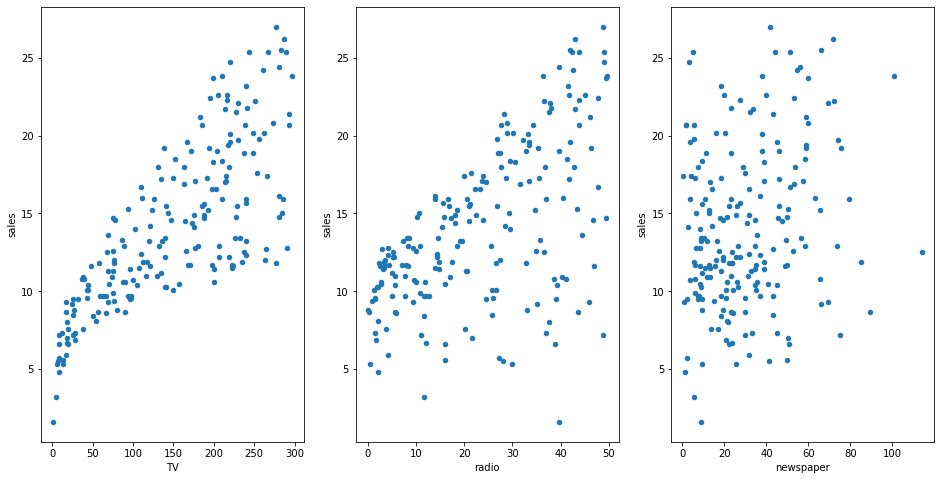

In [13]:
fig,axs=plt.subplots(1,3)
adv_data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
adv_data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
adv_data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

In [14]:
# Here in the above scatterplot TV and sales are positively,linearly correlated.
# Radio and sales aslo shows some positive trend about correlation.
# But in newspaper the data points are to much scattered in random directions so their is no correlation.

In [15]:
adv_data.drop('Unnamed: 0',axis=1,inplace=True)

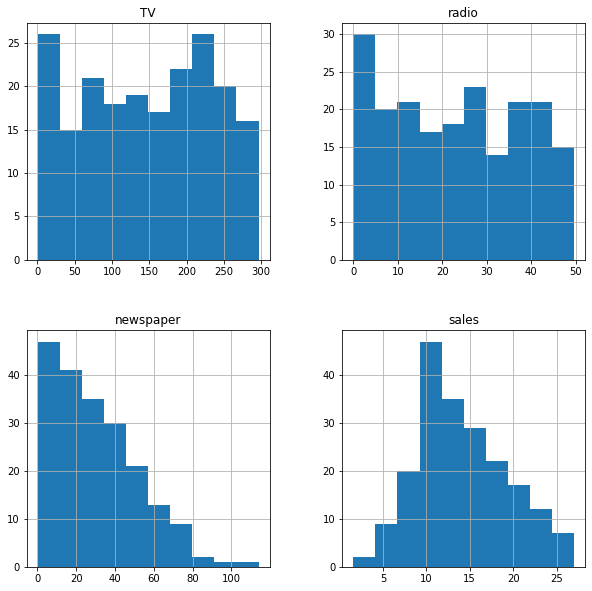

In [16]:
# We will check the dataset with histogram plot.

adv_data.hist( bins = 10, figsize = (10,10))
plt.show()


In [17]:
# Spending budget for advertisments on TV is in all range, same for Radio but less than TV. 
# But on newspapers, less budget is spend

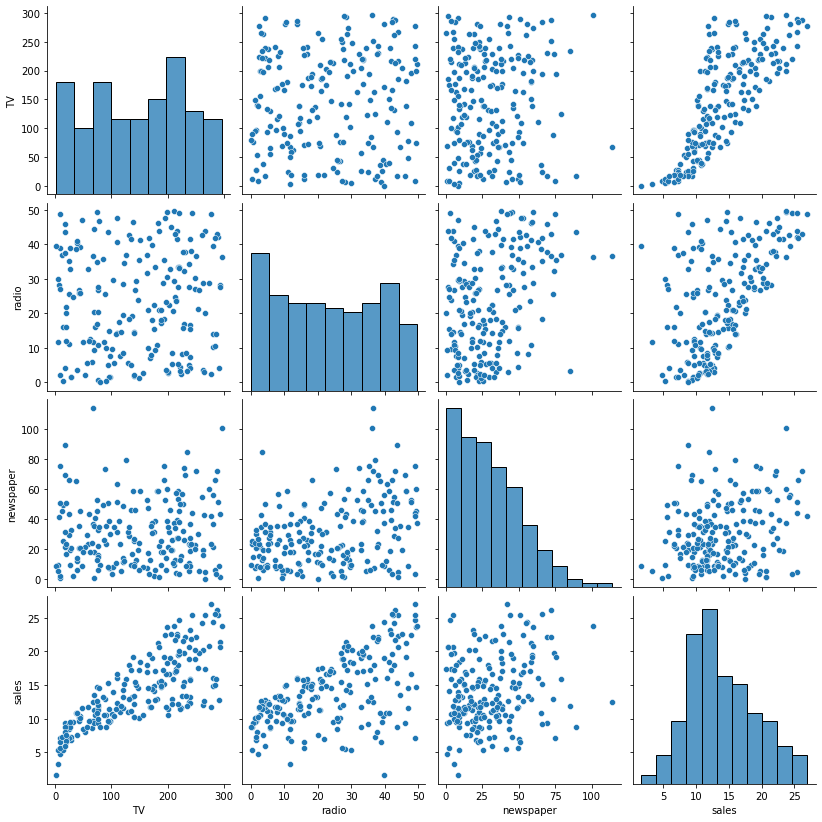

In [18]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(adv_data, size=2.9)
plt.show()

In [19]:
# Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.
# There is no correlation seems between all features.

In [20]:
# Let's check the correlation nummerically and visualize.
adv_data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

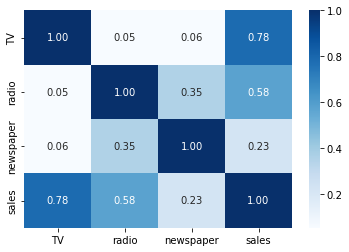

In [21]:
sns.heatmap(adv_data.corr(),annot=True,cmap='Blues',fmt='0.2f')

In [22]:
# It is clearly visible from pairplot, scatterplot and heatmap that TV is most correlated with sales.

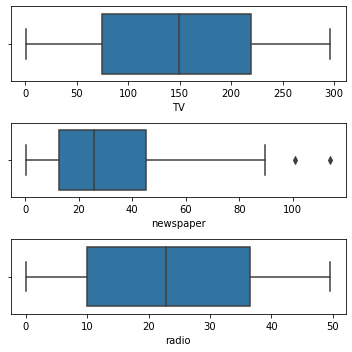

In [23]:
# Checking the Outliers.

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(adv_data['TV'], ax = axs[0])
plt2 = sns.boxplot(adv_data['newspaper'], ax = axs[1])
plt3 = sns.boxplot(adv_data['radio'], ax = axs[2])
plt.tight_layout()


In [24]:
# There are no cosiderable outliers present in dataset.

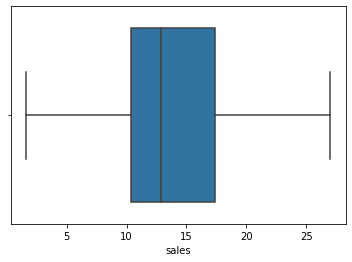

In [25]:
sns.boxplot(adv_data['sales'])
plt.show()

In [26]:
# There is no outlier present in the target column.

In [27]:
# Let's Split the Independent and Target variables in x and y before removing the Skewness.
x=adv_data.drop('sales',axis=1)
y=adv_data['sales']

In [28]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [29]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [30]:
x.skew().sort_values(ascending=False)

newspaper    0.894720
radio        0.094175
TV          -0.069853
dtype: float64

In [31]:
# There is no Skewness in data.

In [32]:
# Let's check the multicollinearity in dependent variables,before that we will scale our data
# Standardizing data with StandardScaler() function
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [33]:
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [34]:
# This is how data looks after scaling
# Let's check the multicollinearity using VIF.

x_scaled.shape[1]

3

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

In [37]:
vif

,vif,Features
0,1.004611,TV
1,1.144952,radio
2,1.145187,newspaper


In [38]:
# The VIF values for the explanatory variables in our regression model are close to 1,
# multicollinearity is not a problem in our example.

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y, test_size=0.20, random_state=30)

In [40]:
# Training and Testing the model using Linear Regression.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression( fit_intercept = True)

regressor.fit(x_train, y_train)

LinearRegression()

In [41]:
# Model Prediction using linear regression.

y_pred = regressor.predict(x_test)

In [42]:
y_pred

array([ 8.95318156, 14.85141425, 14.93914511, 18.50195143, 19.59072741,
        8.23366935, 10.59469328, 19.25634393,  8.06015426, 14.48402273,
       10.31764813, 15.37474737, 14.8914374 , 12.080819  ,  6.26438441,
       18.5991376 , 21.06269854, 13.1452486 , 21.32767238, 24.18536278,
       11.57459552, 10.39697184, 19.2959276 , 12.83507177, 16.91824382,
       15.24956502,  6.16108892, 23.44008915, 14.12266634, 14.81203916,
       19.48562804, 12.80787841, 23.22528264, 15.21073093, 20.3347983 ,
       15.75748942, 12.33261443,  9.83165862, 18.31732486,  7.97338323])

In [43]:
# Root Mean Square Erroe for Accuracy of model.

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.6018445241668007


In [44]:
# R2 Score for accuracy check.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9080112550671722

In [45]:
# Cross Validation Score for checking the effectiveness of model.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(regressor,x,y,cv=8)
print('Cross_validation_score for Linear Regression is:',cvs.mean())


Cross_validation_score for Linear Regression is: 0.8826686689919152


In [46]:
# We got CV score for linear Regression = 88%, that is good enough.

In [47]:
# Model Summary.

import statsmodels.api as sm

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        15:59:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [48]:
## Training and Testing the model using Decision Tree Regressor.


from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [49]:
# model Prediction

y_pred=dt.predict(x_test)

In [50]:
y_pred

array([ 9.7, 13.2, 17.3, 15.7, 20.8, 10.9,  5.5, 19.4, 10.5, 15.2,  8. ,
       14.9, 13.2, 12.2,  6.9, 17.1, 27. , 11.8, 20.8, 25.4, 11.8,  5.6,
       19.4, 11.9, 19. , 13.4,  6.6, 20.8, 13.4, 14.9, 18. , 13.2, 27. ,
       13.6, 20.2, 11.6, 10.8, 10.1, 18. ,  5.9])

In [51]:
# R squared.
score = dt.score(x_train, y_train)
print("R-squared:", score) 

R-squared: 1.0


In [52]:
# Checking the mean square error and Root mean square error for model accuracy

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 


MSE:  2.0830000000000006
RMSE:  1.4432601983010551


In [53]:
# Cross Validation Score for checking the effectiveness of model.


from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=8)
print('Cross_validation_score for Decision Tree Regressor is:',cvs.mean())


Cross_validation_score for Decision Tree Regressor is: 0.9440862948106217


In [54]:
# We get 94% CV score that is very well good.

In [55]:
# Model Evaluation and training using RandomForesr Regressor.

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() 

In [56]:
# Model Training.
rf.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
# Model Prediction.
y_pred = rf.predict(x_test) 
y_pred

array([10.321, 12.438, 16.387, 15.32 , 20.144,  9.753,  5.905, 19.083,
        9.683, 14.363,  8.85 , 15.367, 12.449, 12.642,  7.439, 16.302,
       22.836, 12.761, 21.156, 25.123, 11.91 ,  6.247, 19.184, 11.752,
       17.841, 13.097,  7.001, 21.591, 12.147, 15.032, 20.946, 13.297,
       25.34 , 13.408, 20.318, 12.254, 11.197,  9.798, 19.123,  7.503])

In [65]:
# Checking the MAE and MSE score.
from sklearn.metrics import mean_absolute_error 

In [67]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred)) 

Mean Absolute Error:  0.5465499999999983
Mean Squared Error:  0.5366996499999948


In [71]:
# Checking the cross validation score.
cvs=cross_val_score(rf,x,y,cv=13)
print('Cross_validation_score for RandomForest is:',cvs.mean())


Cross_validation_score for RandomForest is: 0.9779366594614837


In [72]:
# Model Evaluation using SVR.

from sklearn.svm import SVR

In [73]:
# Model Traing.
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [74]:
# Model prediction.
y_pred = svr.predict(x_test) 
y_pred

array([10.25280827, 12.50977444, 15.65271158, 15.39852097, 19.08805872,
        9.14462344, 10.02696912, 20.32736293,  9.86304322, 14.65048359,
        9.63008177, 15.57828846, 12.55086165, 12.63576044,  8.01077589,
       17.35090178, 21.52568155, 13.35803352, 20.43562914, 20.90627251,
       11.60009153,  9.92256841, 20.46023322, 11.71924171, 17.88872654,
       13.50911249,  7.68197337, 15.78415931, 12.55806504, 14.7129012 ,
       18.50839307, 13.41560691, 20.1855245 , 14.45425253, 19.6140747 ,
       12.67064812, 11.54720362,  9.75733916, 17.89351259,  9.41629526])

In [75]:
# MSE and MAE for Accuracy check.
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred)) 

Mean Absolute Error:  1.1777322704175828
Mean Squared Error:  4.112400730627437


In [77]:
# Cross Validation Score for SVR.
cvs=cross_val_score(svr,x,y,cv=13)
print('Cross_validation_score for SVR is:',cvs.mean())


Cross_validation_score for SVR is: 0.8608981808945448


In [ ]:
# We got the cross validation score for SVR =86% which is quite good.

In [ ]:
# Here we can see that Linear Regression is performing very well as compared to others,so we will continue with it. 

In [80]:
# Let's check that the model is overfitting or not.
# Lasso Regularization.

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [82]:
lasso=LassoCV(alphas=None,max_iter=100,normalize=True)
lasso.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [83]:
# Best alpha Parameters.
alpha=lasso.alpha_
alpha

0.006418628639683524

In [84]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.006418628639683524)

In [85]:
lasso_reg.score(x_test,y_test)

0.9079635011278

In [88]:
# Ridge Regularization.
ridge=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

In [89]:
ridge.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [90]:
ridge.alpha_

0.001

In [91]:
# Best alpha parameter.

ridge_model=Ridge(alpha=ridge.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [92]:
ridge_model.score(x_test,y_test)

0.9080106705752475

In [ ]:
# We got the same r2 score for Ridge and Lasso Regression so we can say that the model is not overfitting.

In [97]:
# Saving the model in the pickle format.
import pickle
filename='Advertise.pickle'
pickle.dump(regressor,open(filename,'wb'))